## Observations and Insights 

1. Analyzing the line graph of our chosen mouse's tumor size over time, it appears that the drug did assist in decreasing the size of its tumor. However, we cannot make conclusions from just one mouse. We should run a test on the whole sample vs the other drugs and potentially a placebo.

2. Looking at the scatter plot of weight and tumor volume, along with the correlation coefficient, it appears that the weight and tumor volume of a mouse is strongly linearly associated. There may be other confonding variables causing an increase in both but there is clearly correlation. 

3. One other observation I made while looking over the plots is that there was an even distrubution of total measurements of each drugs. Furthermore, there was an even distribution of males and females in our data. This tells me that the test ran was likely a simple random sample and there was a random assignment of drug regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
total_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#giving columns no spaces for personal use 
total_data.rename(columns={'Mouse ID':'Mouse_ID',
                           'Drug Regimen':'Drug_Regimen', 
                           'Weight (g)':'Weight(g)', 
                           'Tumor Volume (mm3)': 'Tumor_Volume(mm3)', 
                           'Metastatic Sites':'Metastatic_Sites'},
                            inplace = True)
total_data.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight(g),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
print(len(total_data.Mouse_ID.unique()))

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = total_data.duplicated(['Mouse_ID', 'Timepoint'])

ids_to_drop = []
for i in range(0, len(duplicated)):
    if(duplicated[i]):
        ids_to_drop.append(total_data.iloc[i, 0])
print(set(ids_to_drop))

{'g989'}


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
total_data[total_data.Mouse_ID == ids_to_drop[0]]


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight(g),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#would loop if there was multple, but not needed here
total_data = total_data[total_data.Mouse_ID != ids_to_drop[0]]


In [7]:
# Checking the number of mice in the clean DataFrame.
print(len(total_data.Mouse_ID.unique()))

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_groupby = total_data.groupby("Drug_Regimen")
summary_drug_stats = pd.DataFrame()
summary_drug_stats["Mean"] = regimen_groupby["Tumor_Volume(mm3)"].mean()
summary_drug_stats["Median"] = regimen_groupby["Tumor_Volume(mm3)"].median()
summary_drug_stats["Variance"] = regimen_groupby["Tumor_Volume(mm3)"].var()
summary_drug_stats["Standard_Deviation"] = regimen_groupby["Tumor_Volume(mm3)"].std()
summary_drug_stats["SEM"] = regimen_groupby["Tumor_Volume(mm3)"].sem()

summary_drug_stats

,Mean,Median,Variance,Standard_Deviation,SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_drug_stats_agg = regimen_groupby["Tumor_Volume(mm3)"].agg(
                                    ['mean', 'median', 'var', 'std', 'sem'])

summary_drug_stats_agg.rename(columns={
                        'mean':'Mean',
                        'median': 'Median',
                        'var': 'Variance',
                        'std': 'Standard_Deviation',
                        'sem':'SEM'}, inplace = True)

summary_drug_stats_agg

,Mean,Median,Variance,Standard_Deviation,SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

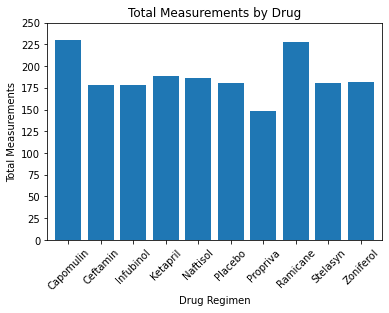

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
x_axis = summary_drug_stats.index
y_axis = regimen_groupby.Mouse_ID.count()

bar_plot = pd.DataFrame({"Drug Regimen":x_axis, "Total Measurements":y_axis})

bar_plot.plot(x = "Drug Regimen",
            y = "Total Measurements",
            kind = "bar",
            xlabel = "Drug Regimen",
            ylabel = "Total Measurements",
            title = "Total Measurements by Drug",
            rot=45,
            legend = False,
            yticks = range(0, 275, 25),
            ylim = (0,250),
            width = .8)
plt.show()

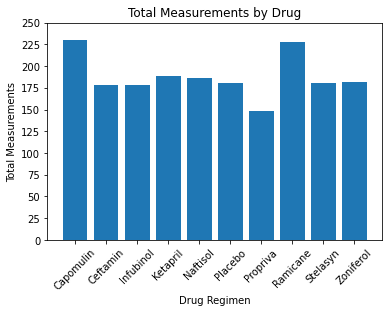

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")
plt.title("Total Measurements by Drug")
plt.xticks(rotation=45)
plt.yticks(range(0, 275, 25))
plt.ylim(0,250)
plt.bar(x_axis, y_axis, width =.8)

plt.show()

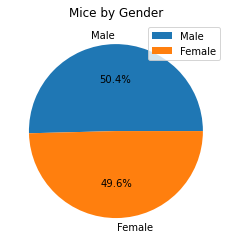

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#create grouby to ensure unique mouses
mouse_grouby = total_data.groupby('Mouse_ID')
gender_dist = mouse_grouby.Sex.max().value_counts()

gender_dist.plot(
            kind="pie",
            autopct="%1.1f%%",
            title = "Mice by Gender",
            ylabel="")
plt.legend(loc="upper right")
plt.show()

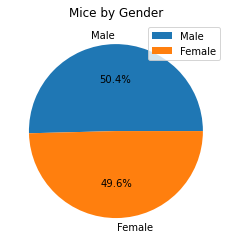

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.title("Mice by Gender")
plt.pie(gender_dist, labels=labels, autopct="%1.1f%%")
plt.legend(loc="upper right")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_drugs = total_data[(total_data.Drug_Regimen == "Capomulin") |
                        (total_data.Drug_Regimen == "Ramicane") |
                        (total_data.Drug_Regimen == "Infubinol") |
                        (total_data.Drug_Regimen == "Ceftamin")]

mouse_four_drug = four_drugs.groupby("Mouse_ID").Timepoint.agg('max')
mouse_four_drug = mouse_four_drug.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

four_drug_latest_time = pd.merge(total_data, mouse_four_drug, on=["Mouse_ID", "Timepoint"])

four_drug_latest_time.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight(g),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = four_drug_latest_time.loc[
            four_drug_latest_time["Drug_Regimen"] == drug]["Tumor_Volume(mm3)"]
    
    # add subset 
    tumor_vol_data.append(drug_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_data.quantile([.25,.50,.75])
    IQR = quartiles[.75] - quartiles[.25]
    upperBound = quartiles[.75] + 1.5 * IQR
    lowerBound = quartiles[.25] - 1.5 * IQR
    
    outliers = False
    outlier_count = 0
    for data in drug_data:
        if((data > upperBound) | (data < lowerBound)):
            outliers = True
            outlier_count += 1
    if(outliers):
        print(f"There are {outlier_count} outlier(s) in the {drug} data.")

There are 1 outlier(s) in the Infubinol data.


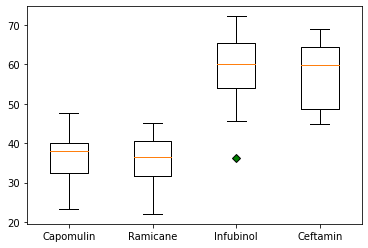

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=green_diamond)
plt.show()

## Line and Scatter Plots

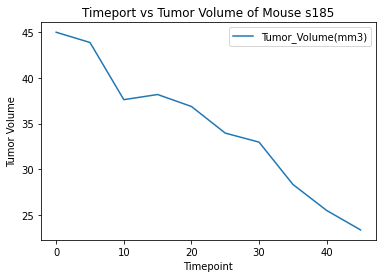

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#grab a mouse
chosen_mouse = total_data.loc[total_data.Drug_Regimen == 'Capomulin'].Mouse_ID.iloc[0]
#grab its data
chosen_mouse_data = total_data[total_data.Mouse_ID == chosen_mouse]
chosen_mouse_data.plot(x = 'Timepoint',
                       y = 'Tumor_Volume(mm3)',
                       title = f"Timeport vs Tumor Volume of Mouse {chosen_mouse}",
                       ylabel = 'Tumor Volume',
                       xlabel = 'Timepoint')
plt.show()

# # below gives graphs for all 25 mice treated by Capomulin
# cap_data = total_data[total_data.Drug_Regimen == 'Capomulin']
# cap_groupby = cap_data.groupby('Mouse_ID')
# cap_groupby.plot('Timepoint', 'Tumor_Volume(mm3)')

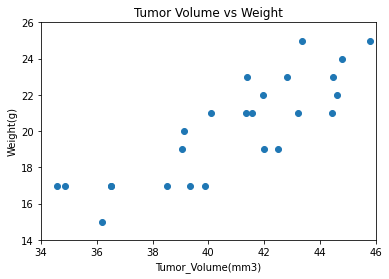

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#set up data
cap_data = total_data[total_data.Drug_Regimen == 'Capomulin']
cap_groupby = cap_data.groupby('Mouse_ID')
x_axis = cap_groupby['Tumor_Volume(mm3)'].mean()
y_axis = cap_groupby['Weight(g)'].mean()

#plot data
plt.xlabel('Tumor_Volume(mm3)')
plt.ylabel('Weight(g)')
plt.title('Tumor Volume vs Weight')
plt.xlim(34, 46)
plt.ylim(14, 26)
plt.scatter(x_axis, y_axis)
plt.show()

## Correlation and Regression

The correlation coefficient is 0.84.
The linear regression line is: y = 0.74x + -10.15


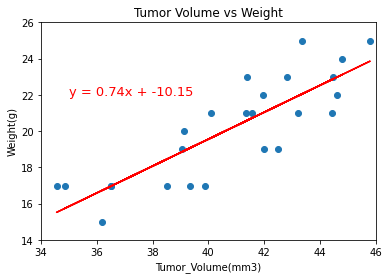

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"The correlation coefficient is {round(rvalue, 2)}.\nThe linear regression line is: {line_eq}")

#calculate regression line values
regress_values = x_axis * slope + intercept

#set up plot from above
plt.xlabel('Tumor_Volume(mm3)')
plt.ylabel('Weight(g)')
plt.title('Tumor Volume vs Weight')
plt.xlim(34, 46)
plt.ylim(14, 26)
plt.scatter(x_axis, y_axis)

#add line plus annotation
plt.plot(x_axis, regress_values, color = 'r')
plt.annotate(line_eq,(35,22),fontsize=13,color="red")
plt.show()